<a href="https://colab.research.google.com/github/Aartizikre150/DAB-303/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 4: Customer Lifecycle Value (CLV)**

**Introduction :**
The purpose of the lab is to understand and gain insights from a retailer dataset, by performing
various exploratory data analysis, data visualization, and data modelling tasks, aiming to investigate
and analyze product analytics and Customer Lifecycle Value (CLV)

### Team Details:

**Group No. 10**

Aarti Anil Zikre

Andrews Truman

Premkumar Janakbhai Patel

Vitthlesh Sheth

###  Load the needed libraries

In [2]:
!pip install skimpy==0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.6.0
    Uninstalling rich-13.6.0:
      Successfully uninstalled rich-13.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.4 requires rich>=11.1, but you have rich 10.16.2 which is incompatible.
ibis-framework 6.2.0 requires rich<14,>=12.4.4, but you have rich 10.16.2 which is incompatible.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from datetime import date

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the dataset as a Pandas Dataframe, followed by data pre-processing and data cleaning

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DAB303/Project4/Customer_Lifetime_Value_Dataset.csv")
df.head(10)

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11
5,23498,2021-05-31,2022-02-03,8,10665,Word of mouth,1,2,O25,ignored,5.000000,credit card,0,no,7
6,22735,2021-09-21,2021-12-14,29,4866,Word of mouth,0,4,V08,ignored,1.961208,credit card,0,yes,29
7,41296,2019-06-28,2023-07-31,25,8826,In-store promotions,0,2,S31,opened mail,5.000000,cash,0,no,21
8,14351,2019-06-05,2019-06-13,7,9978,Influencer endorsements,0,4,Y30,ignored,5.000000,debit card,0,no,7
9,22571,2020-05-15,2023-06-30,26,6085,Influencer endorsements,1,6,C86,ignored,5.000000,apple pay,0,no,17


In [5]:
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓                                                            │
│ ┃ dataframe         ┃ Values ┃                                                            │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩                                                            │
│ │ Number of rows    │ 10000  │                                                            │
│ │ Number of columns │ 15     │                                                            │
│ └───────────────────┴────────┘                                                            │
│       Data Types                                                                          │
│ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                                   │
│ ┃ Column Type ┃ Count ┃                                                                   │
│ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                                   │
│ │ object      │ 8     │                                                                   │
│ │ int64       │ 6     │                                                                   │
│ │ float64     │ 1     │                                                                   │
│ └─────────────┴───────┘                                                                   │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓ │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100  ┃ hist  ┃ │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃        ┃        ┃        ┃       ┃       ┃ │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃        ┃        ┃        ┃       ┃       ┃ │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩ │
│ │ custom │ 0      │ 1.0    │ 27519. │ 13118. │ 5000.0 │ 16144. │ 38967. │ 49994 │ █████ │ │
│ │ erid   │        │        │ 24     │ 35     │        │ 75     │ 25     │ .0    │       │ │
│ │ totalp │ 0      │ 1.0    │ 19.28  │ 7.83   │ 1.0    │ 13.0   │ 26.0   │ 40.0  │ ▃▆█▇  │ │
│ │ urchas │        │        │        │        │        │        │        │       │       │ │
│ │ es     │        │        │        │        │        │        │        │       │       │ │
│ │ totalr │ 0      │ 1.0    │ 8521.8 │ 2388.4 │ 4401.0 │ 6427.7 │ 10589. │ 12678 │ █████ │ │
│ │ evenue │        │        │ 8      │ 5      │        │ 5      │ 25     │ .0    │       │ │
│ │ churni │ 0      │ 1.0    │ 0.5    │ 0.5    │ 0.0    │ 0.0    │ 1.0    │ 1.0   │ █   █ │ │
│ │ ndicat │        │        │        │        │        │        │        │       │       │ │
│ │ or     │        │        │        │        │        │        │        │       │       │ │
│ │ discou │ 0      │ 1.0    │ 2.99   │ 2.01   │ 0.0    │ 1.0    │ 5.0    │ 6.0   │ █▄▄▄█ │ │
│ │ ntsuse │        │        │        │        │        │        │        │       │       │ │
│ │ d      │        │        │        │        │        │        │        │       │       │ │
│ │ feedba │ 0      │ 1.0    │ 4.43   │ 0.92   │ 1.01   │ 4.25   │ 5.0    │ 5.0   │   ▁▁█ │ │
│ │ ckscor │        │        │        │        │        │        │        │       │       │ │
│ │ e      │        │        │        │        │        │        │        │       │       │ │
│ │ freque │ 0      │ 1.0    │ 10.05  │ 7.1    │ 1.0    │ 4.0    │ 14.0   │ 31.0  │ █▆▄▂▁ │ │
│ │ ncy    │        │        │        │        │        │        │        │       │       │ │
│ └────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴───────┘ │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [6]:
# Rename the columns
df.rename(columns={
    'firstpurchasedate': 'FirstPurchase',
    'lastpurchasedate': 'LastPurchase',
    'referralsource': 'Referral',
    'churnindicator': 'Churn',
    'discountsused': 'Discounts',
    'productcategory': 'Category',
    'responsetolastcampaign': 'CampaignResponse',
    'preferredpaymentmethod': 'PaymentMethod',
    'supportticketsraised': 'TicketCount',
    'hasloyaltycard': 'LoyaltyCard',
    'totalpurchases': 'purchases',
    'totalrevenue': 'revenue'
}, inplace=True)

In [7]:
# a. Create 'AvgPurchaseValue'
df['AvgPurchaseValue'] = df['revenue'] / df['purchases']

# b. Create 'Recency'
from datetime import datetime
df['LastPurchase'] = pd.to_datetime(df['LastPurchase']) # Convert to datetime if not already
current_date = datetime.now()  # Assuming this is the current date
df['Recency'] = (current_date - df['LastPurchase']).dt.days

# c. Create 'Tenure'
df['FirstPurchase'] = pd.to_datetime(df['FirstPurchase'])  # Convert to datetime if not already
df['Tenure'] = (current_date - df['FirstPurchase']).dt.days

# d. Create 'AvgTimeBetweenPurchases'
df['AvgTimeBetweenPurchases'] = (df['LastPurchase'] - df['FirstPurchase']).dt.days / df['purchases']


### Perform exploratory data analysis

#### Prelininary EDA

##### Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure

In [8]:
df.head(5)

,customerid,FirstPurchase,LastPurchase,purchases,revenue,Referral,Churn,Discounts,Category,CampaignResponse,feedbackscore,PaymentMethod,TicketCount,LoyaltyCard,frequency,AvgPurchaseValue,Recency,Tenure,AvgTimeBetweenPurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,619,684,9.285714
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,286,1510,61.200000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,649,885,8.137931
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,451,840,25.933333
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,615,1030,31.923077


##### Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?

In [9]:
# Convert 'Churn' column to categorical
df['Churn'] = df['Churn'].astype('object')

# Check data types of each column
data_types = df.dtypes

# Count the number of columns per data type
numerical_count = data_types[data_types == 'int64'].count() + data_types[data_types == 'float64'].count()
categorical_count = data_types[data_types == 'object'].count()
date_count = data_types[data_types == 'datetime64[ns]'].count()

# Print the data type report
print("Data Types of Each Column:\n")
print(data_types)

# Print the report
print("\n\nNumber of Numerical Columns:", numerical_count)
print("Number of Categorical Columns:", categorical_count)
print("Number of Date Columns:", date_count)



Data Types of Each Column:

customerid                          int64
FirstPurchase              datetime64[ns]
LastPurchase               datetime64[ns]
purchases                           int64
revenue                             int64
Referral                           object
Churn                              object
Discounts                           int64
Category                           object
CampaignResponse                   object
feedbackscore                     float64
PaymentMethod                      object
TicketCount                        object
LoyaltyCard                        object
frequency                           int64
AvgPurchaseValue                  float64
Recency                             int64
Tenure                              int64
AvgTimeBetweenPurchases           float64
dtype: object


Number of Numerical Columns: 10
Number of Categorical Columns: 7
Number of Date Columns: 2


##### Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.

In [10]:
df.describe()

,customerid,purchases,revenue,Discounts,feedbackscore,frequency,AvgPurchaseValue,Recency,Tenure,AvgTimeBetweenPurchases
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27519.237400,19.28050,8521.876100,2.993600,4.433905,10.053700,629.636381,628.028900,1181.549300,34.666420
std,13118.347463,7.82962,2388.452322,2.005283,0.920760,7.098652,816.565606,392.283779,392.949289,44.310563
min,5000.000000,1.00000,4401.000000,0.000000,1.006071,1.000000,123.150000,77.000000,82.000000,0.000000
25%,16144.750000,13.00000,6427.750000,1.000000,4.251318,4.000000,314.570238,297.000000,896.000000,13.649265
50%,27617.000000,20.00000,8543.000000,3.000000,4.985672,9.000000,435.362732,558.500000,1242.000000,26.888889
75%,38967.250000,26.00000,10589.250000,5.000000,5.000000,14.000000,649.432456,902.000000,1520.000000,42.265873
max,49994.000000,40.00000,12678.000000,6.000000,5.000000,31.000000,12658.000000,1725.000000,1745.000000,1479.000000


##### Identify any missing values in the dataset. How many missing values are there  in each column?

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

customerid                 0
FirstPurchase              0
LastPurchase               0
purchases                  0
revenue                    0
Referral                   0
Churn                      0
Discounts                  0
Category                   0
CampaignResponse           0
feedbackscore              0
PaymentMethod              0
TicketCount                0
LoyaltyCard                0
frequency                  0
AvgPurchaseValue           0
Recency                    0
Tenure                     0
AvgTimeBetweenPurchases    0
dtype: int64


####  Univariate Analysis:

##### Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?

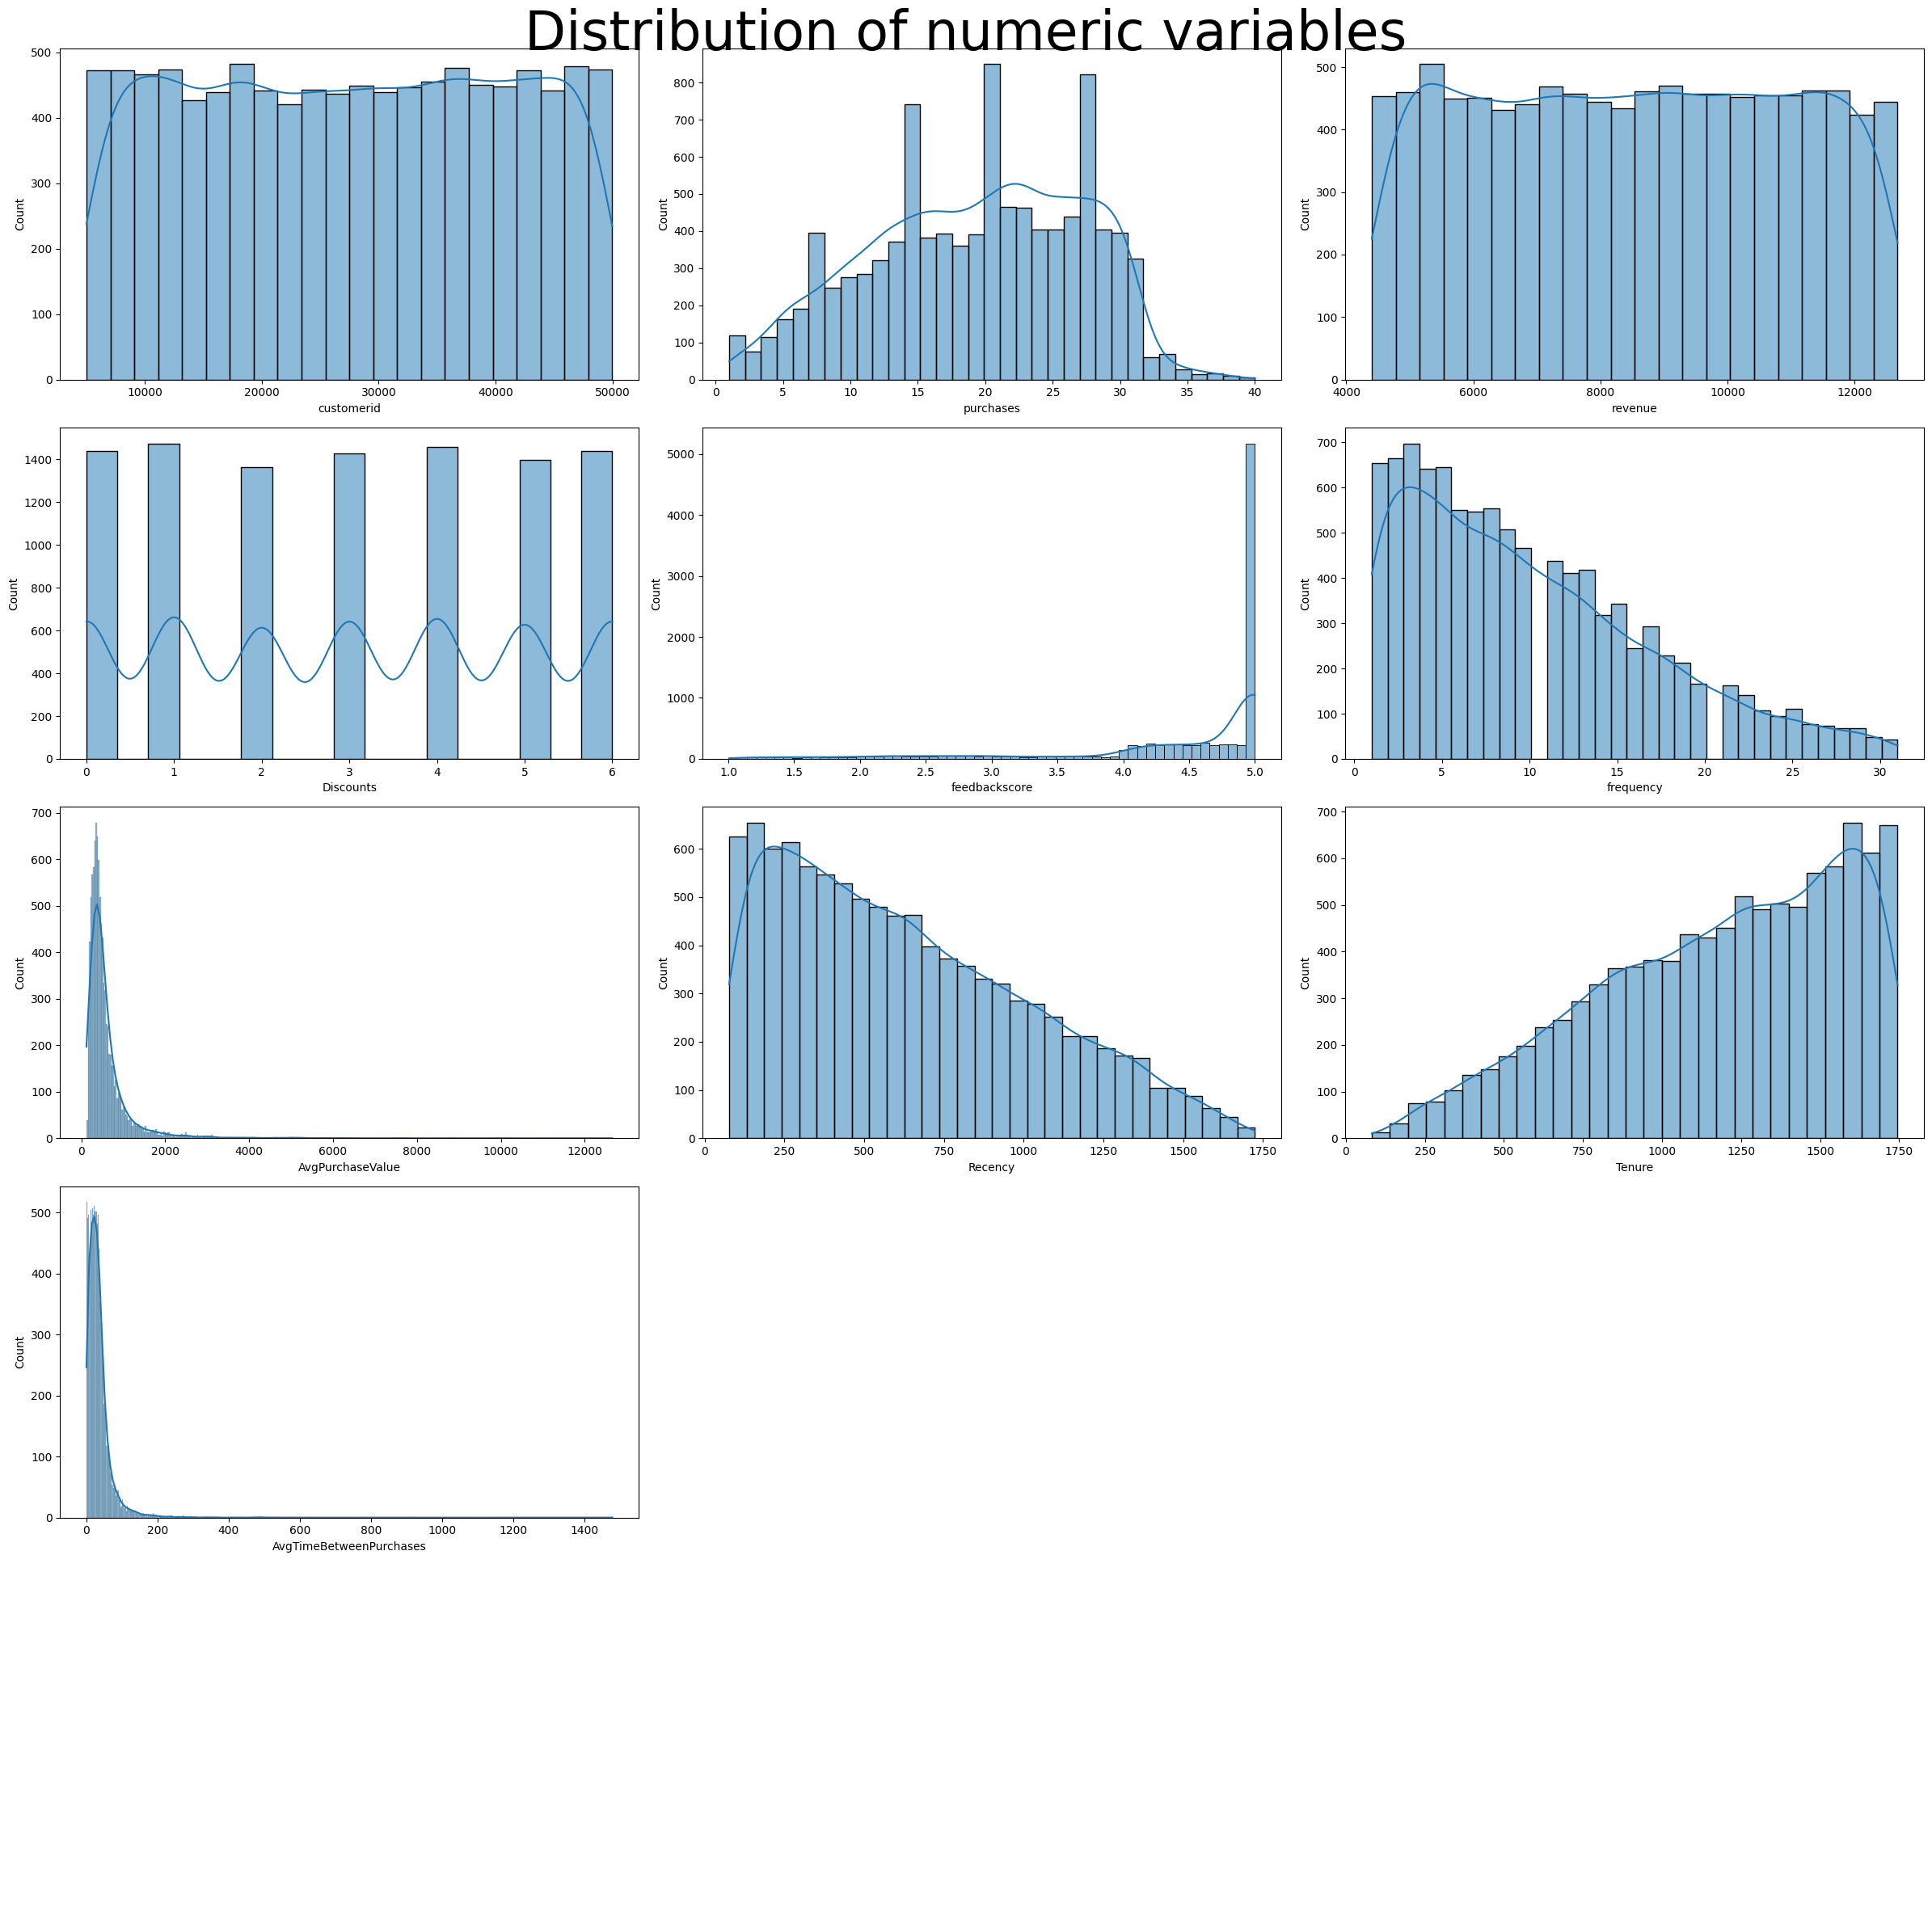

In [12]:
# Select the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns based on the number of numeric columns
num_rows, num_cols = 5, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 24))
fig.suptitle("Distribution of numeric variables", size=48)

# Create histograms for numeric variables using Seaborn
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(numeric_columns.columns):
            sns.histplot(df[numeric_columns.columns[index]], ax=axes[i, j], kde=True)
        else:
            axes[i, j].axis('off')  # Disable empty subplots

plt.tight_layout()
plt.show()

##### For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?

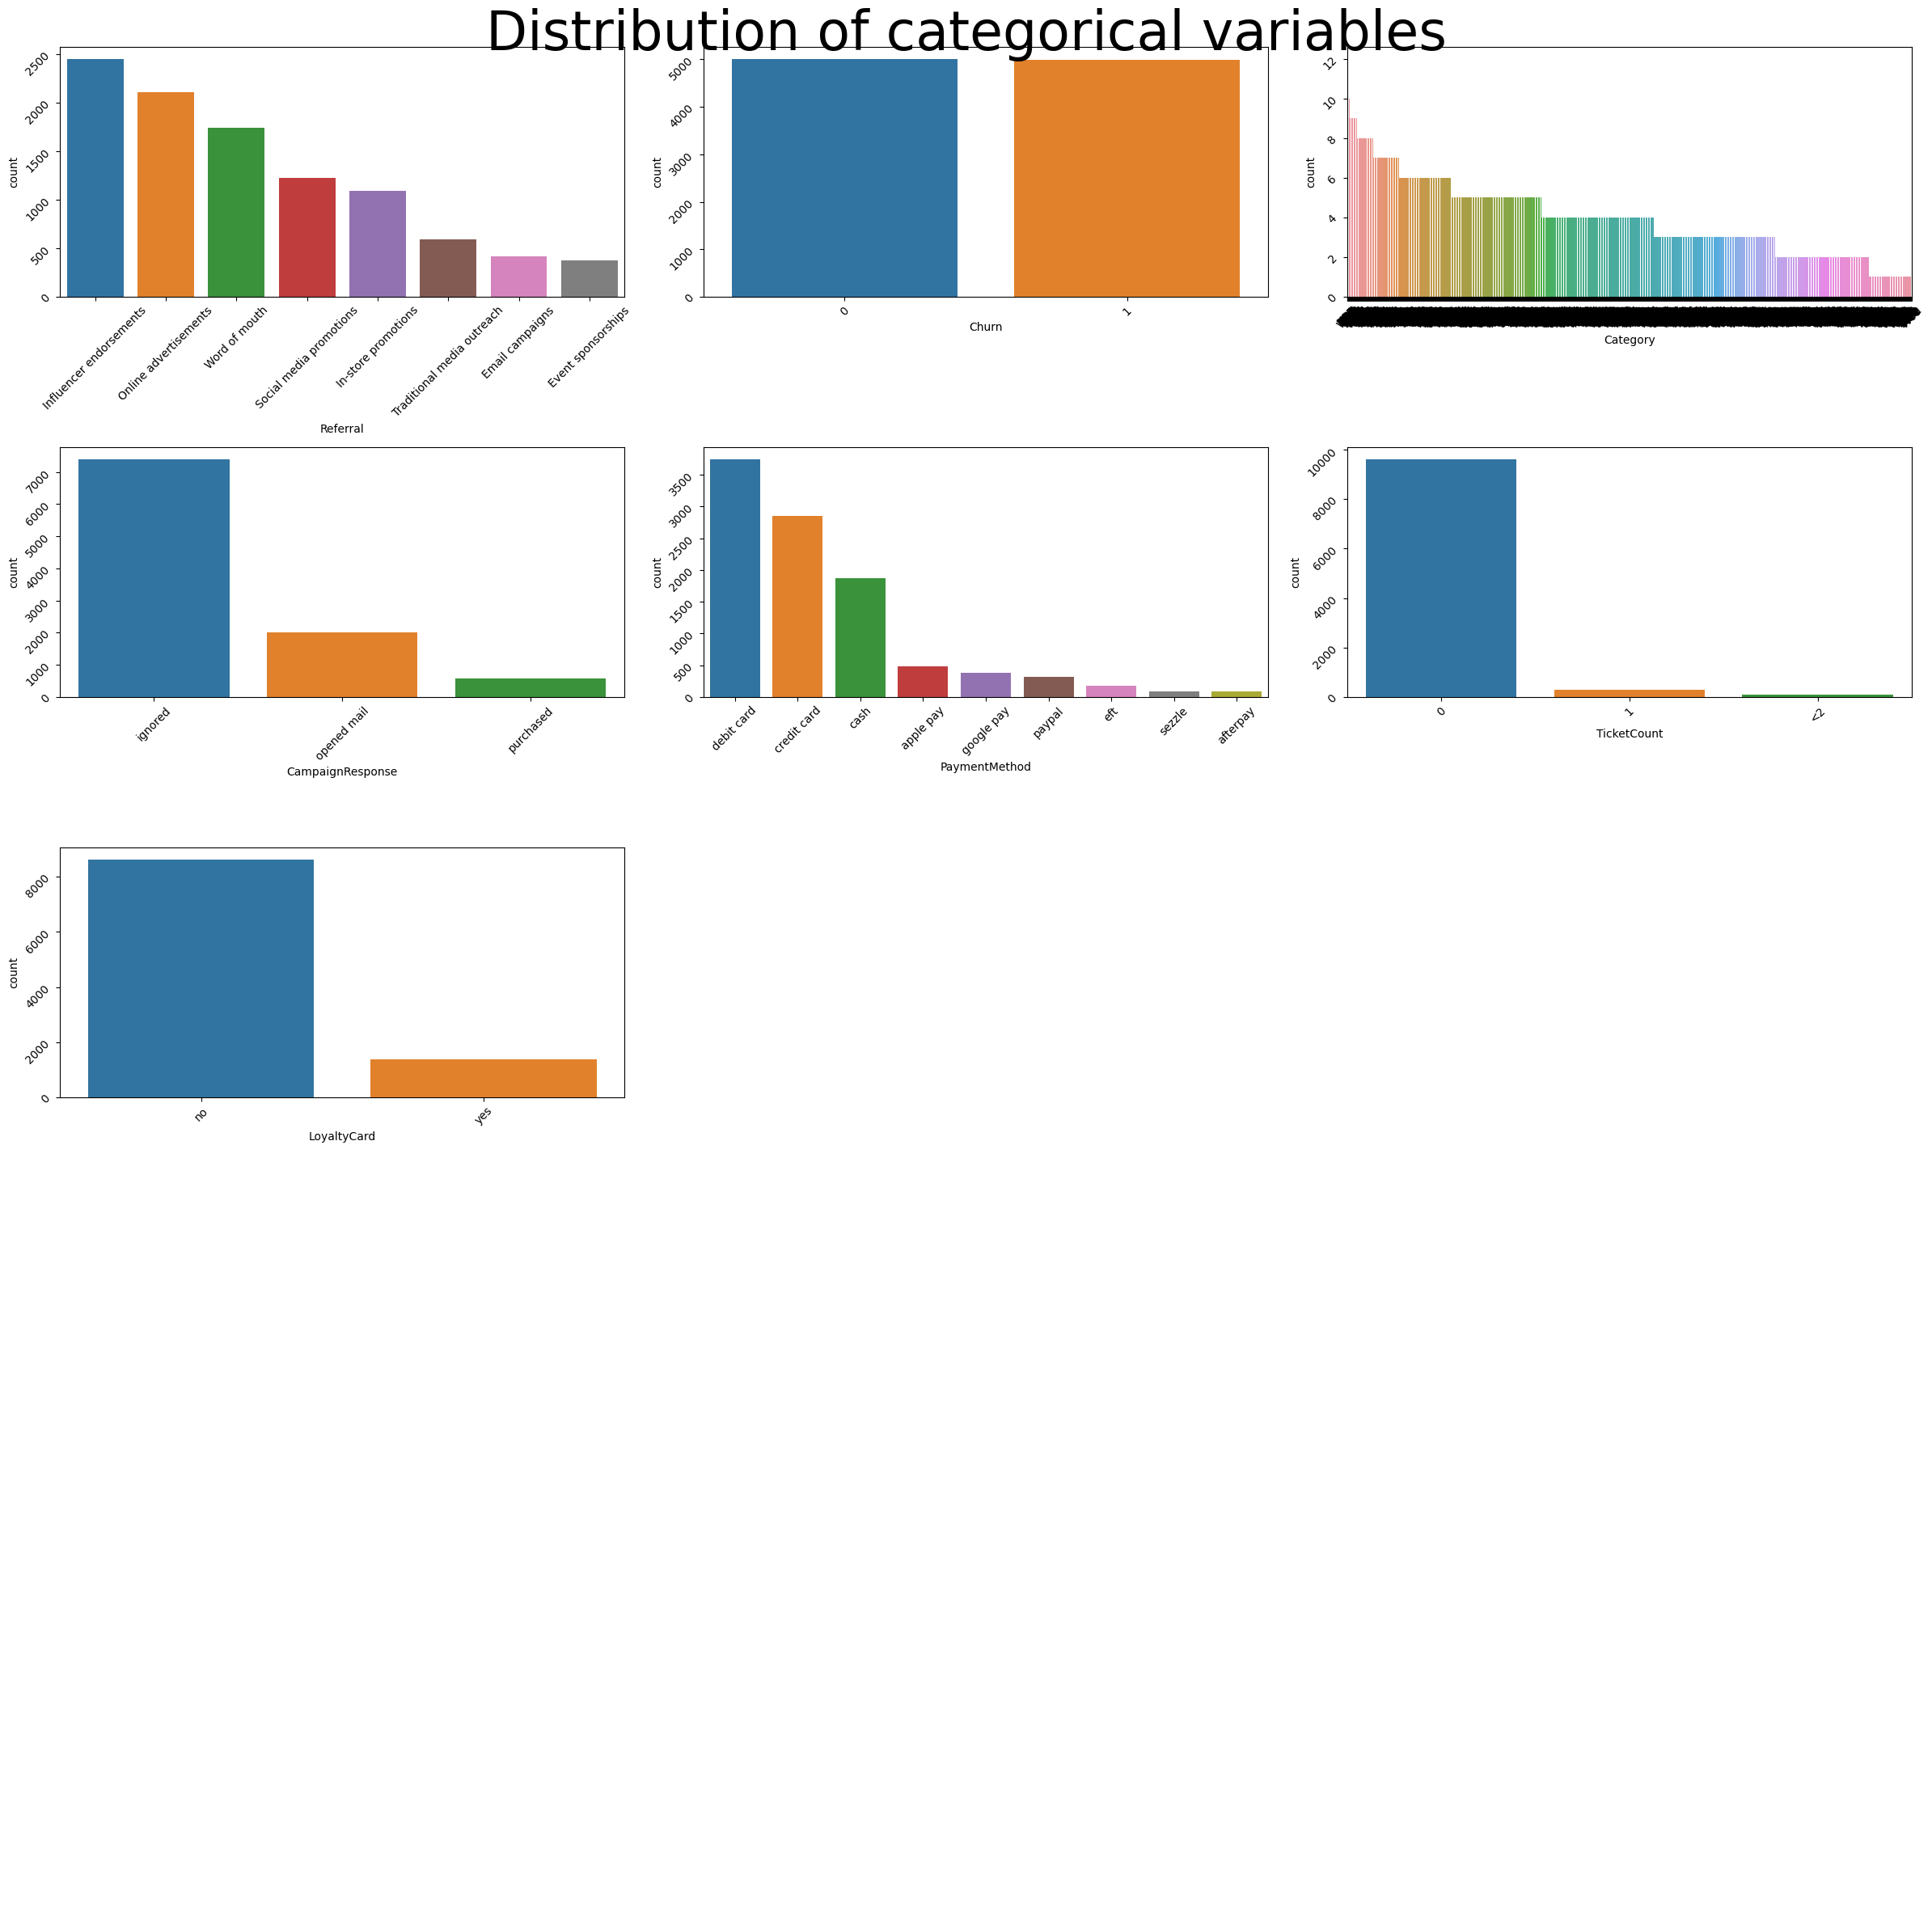

In [13]:
# Select the categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Calculate the number of rows and columns based on the number of categorical columns
num_rows, num_cols = 5, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 24))
fig.suptitle("Distribution of categorical variables", size=48)

# Create bar plots for categorical variables using Seaborn
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(categorical_columns.columns):
            sns.countplot(data=df, x=categorical_columns.columns[index], ax=axes[i, j], order=df[categorical_columns.columns[index]].value_counts().index)
            axes[i, j].tick_params(labelrotation=45)
        else:
            axes[i, j].axis('off')  # Disable empty subplots

plt.tight_layout()
plt.show()


#### Bivariate analysis

##### Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?

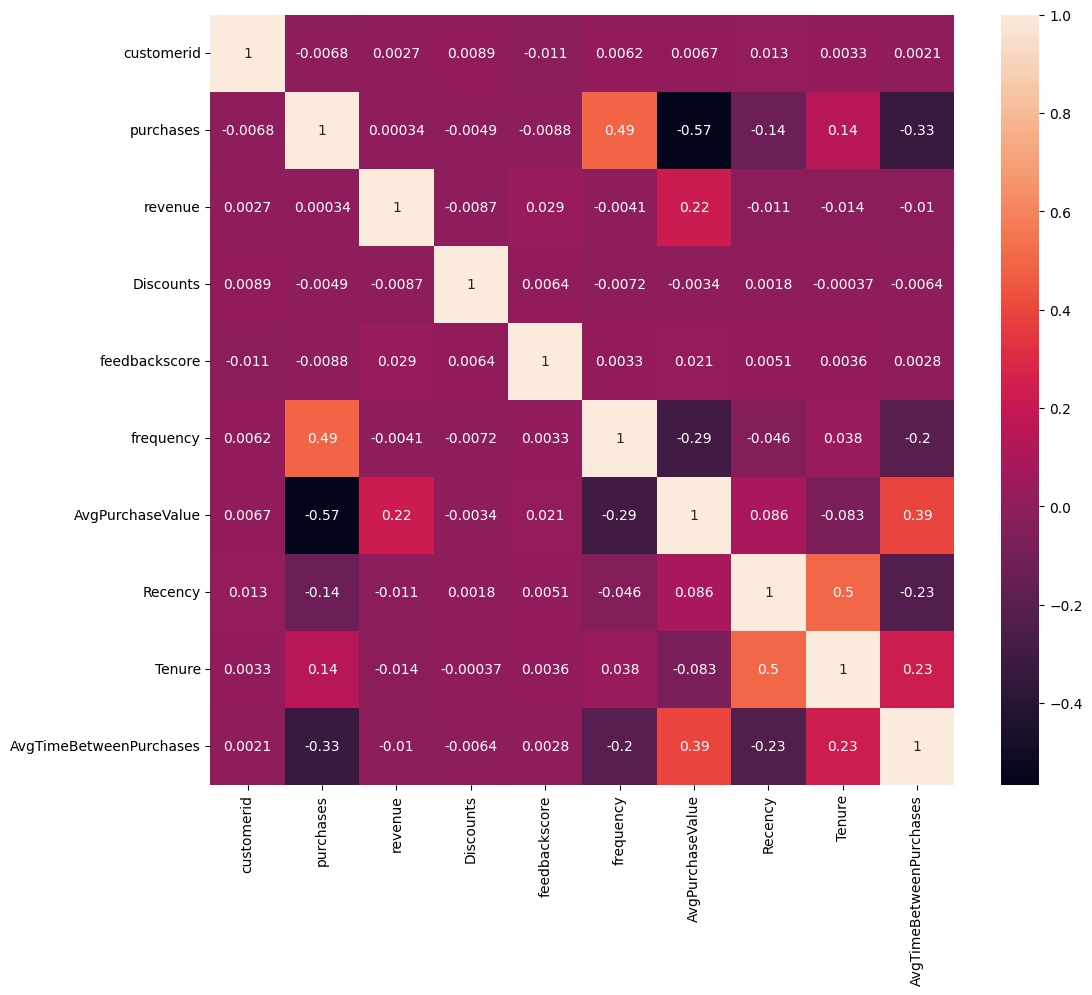

In [14]:
plt.figure(figsize=(12, 10))
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#####  Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?

In [15]:
print("Numeric columns are:", numeric_columns.columns)

Numeric columns are: Index(['customerid', 'purchases', 'revenue', 'Discounts', 'feedbackscore',
       'frequency', 'AvgPurchaseValue', 'Recency', 'Tenure',
       'AvgTimeBetweenPurchases'],
      dtype='object')


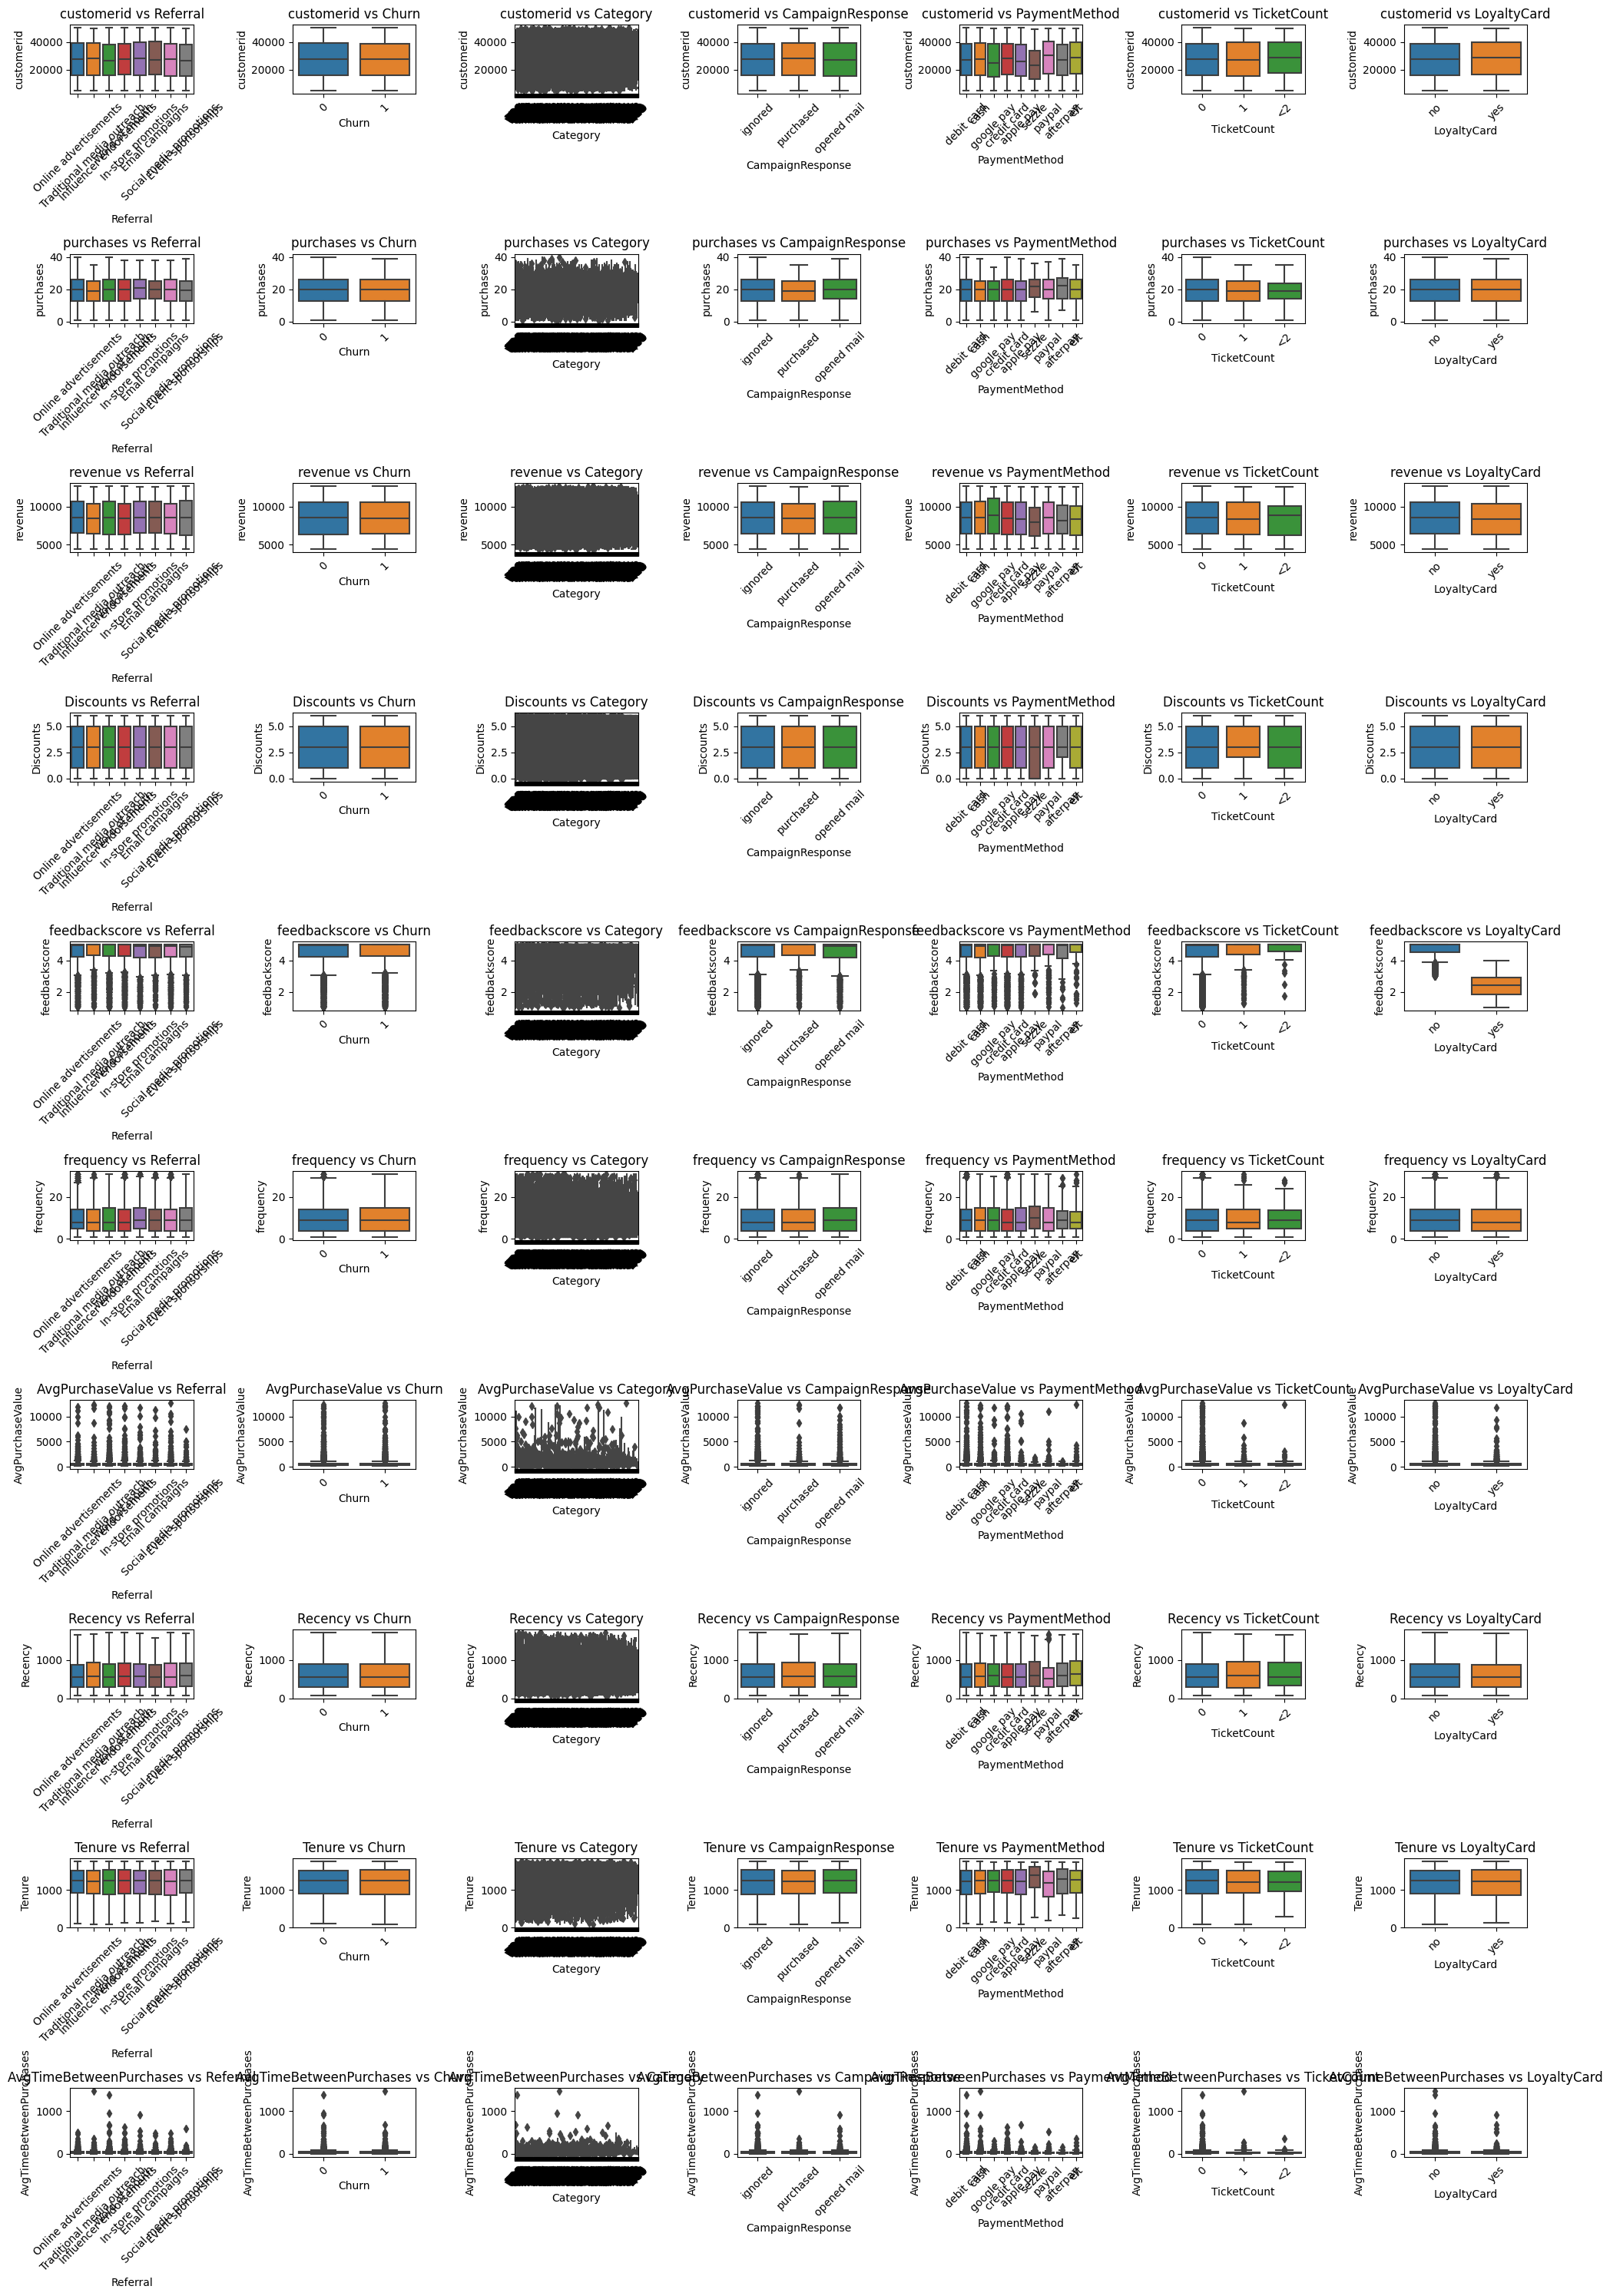

In [16]:
# Create multiple box plots for numeric_columns against each categorical column
num_rows = len(numeric_columns.columns)
num_cols = len(categorical_columns.columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i, numeric_col in enumerate(numeric_columns):
    for j, categorical_col in enumerate(categorical_columns):
        sns.boxplot(x=categorical_col, y=numeric_col, data=df, ax=axes[i, j])
        axes[i, j].set_title(f"{numeric_col} vs {categorical_col}")
        axes[i, j].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



##### Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?

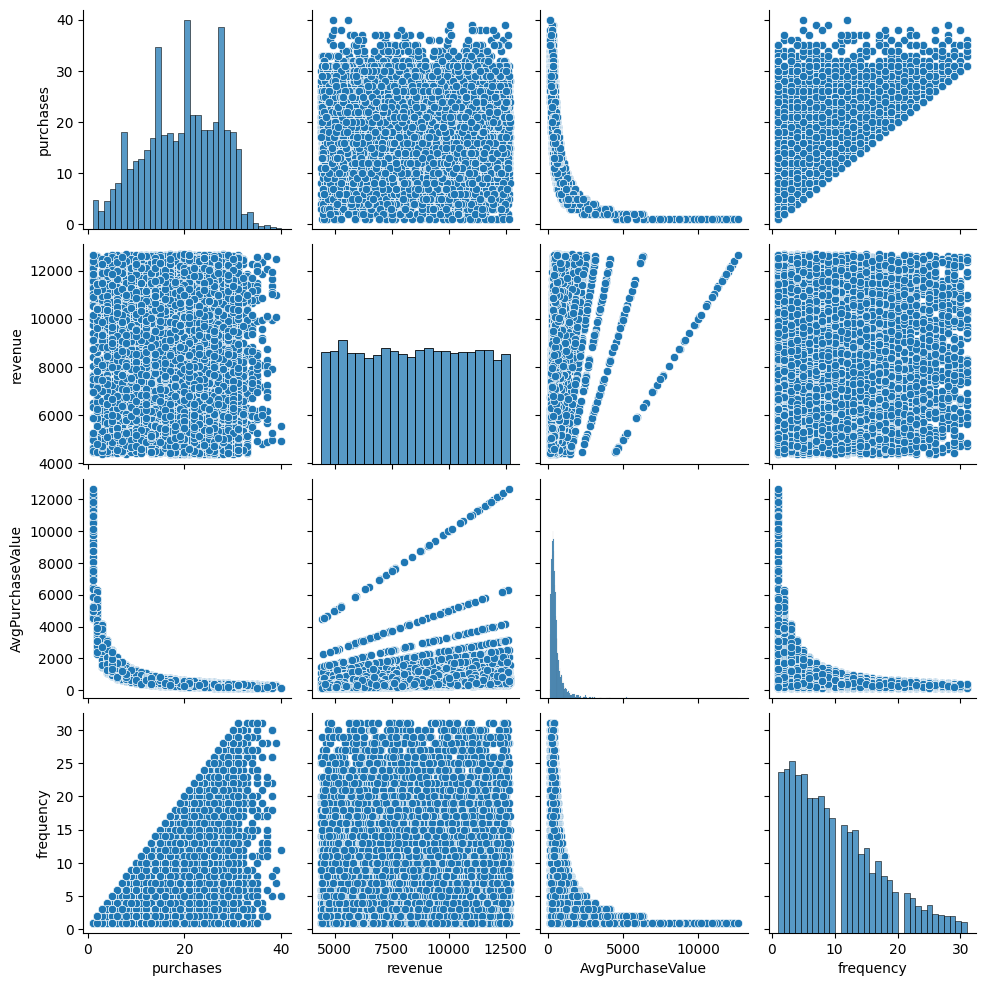

In [17]:
# Select a subset of columns for pair plotting
selected_columns = ['purchases', 'revenue', 'AvgPurchaseValue', 'frequency']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.show()


##### Analyze the total revenue trend based on the year of the first purchase. In  which year did customers contribute the most to total revenue?

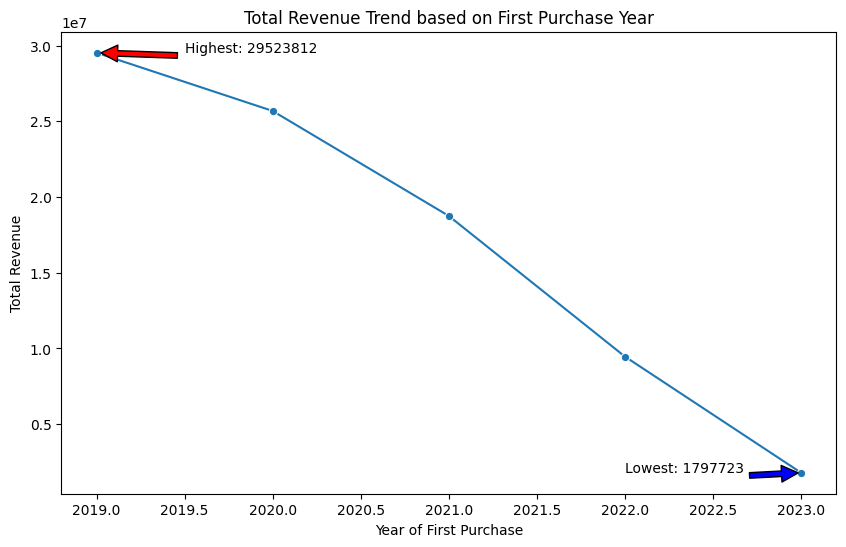

The year with the highest total revenue: 2019
The highest total revenue: 29523812


In [18]:

# Extract the year of the first purchase
df['FirstPurchaseYear'] = df['FirstPurchase'].dt.year

# Group by the year and calculate total revenue
revenue_by_year = df.groupby('FirstPurchaseYear')['revenue'].sum()

# Plot the total revenue trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=revenue_by_year.index, y=revenue_by_year.values, marker='o')
plt.title('Total Revenue Trend based on First Purchase Year')
plt.xlabel('Year of First Purchase')
plt.ylabel('Total Revenue')

# Identify the year with the highest total revenue
max_revenue_year = revenue_by_year.idxmax()
max_revenue_value = revenue_by_year.max()

# Identify the year with the lowest total revenue
min_revenue_year = revenue_by_year.idxmin()
min_revenue_value = revenue_by_year.min()

# Annotate the highest and lowest points
plt.annotate(f'Highest: {max_revenue_value}', xy=(max_revenue_year, max_revenue_value), xytext=(max_revenue_year + 0.5, max_revenue_value + 500), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Lowest: {min_revenue_value}', xy=(min_revenue_year, min_revenue_value), xytext=(min_revenue_year - 1, min_revenue_value - 500), arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()
# Identify the year with the highest total revenue
max_revenue_year = revenue_by_year.idxmax()
max_revenue_value = revenue_by_year.max()

print(f"The year with the highest total revenue: {max_revenue_year}")
print(f"The highest total revenue: {max_revenue_value}")

##### Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score

In [19]:
# Calculate Recency, Frequency, and Monetary values
today = datetime.now()
df['Recency'] = (today - df['LastPurchase']).dt.days
df['Frequency'] = df['purchases']
df['Monetary'] = df['revenue']

# Assign quartiles for Recency, Frequency, and Monetary
recency_quartiles = pd.qcut(df['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
frequency_quartiles = pd.qcut(df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
monetary_quartiles = pd.qcut(df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)

# Create an RFM Score column
df['RFM_Score'] = recency_quartiles + frequency_quartiles + monetary_quartiles

# Identify the top 5% of customers
top_5_percent_customers = df[df['RFM_Score'] >= df['RFM_Score'].quantile(0.95)]

# List customerid and associated RFM_Score for the top 5%
result = top_5_percent_customers[['customerid', 'RFM_Score']]
result


,customerid,RFM_Score
2,19680,7
11,42107,8
19,27531,7
29,41625,8
40,35469,9
...,...,...
9973,48836,7
9974,40864,7
9978,12730,8
9981,5677,7


#### Multivariate analysis:

##### Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn

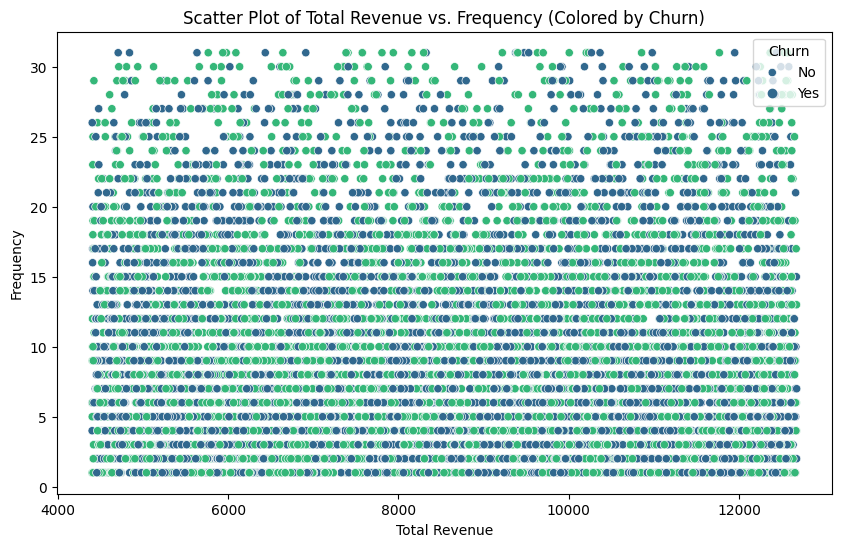

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='frequency', hue='Churn', data=df, palette='viridis')
plt.title('Scatter Plot of Total Revenue vs. Frequency (Colored by Churn)')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

##### Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

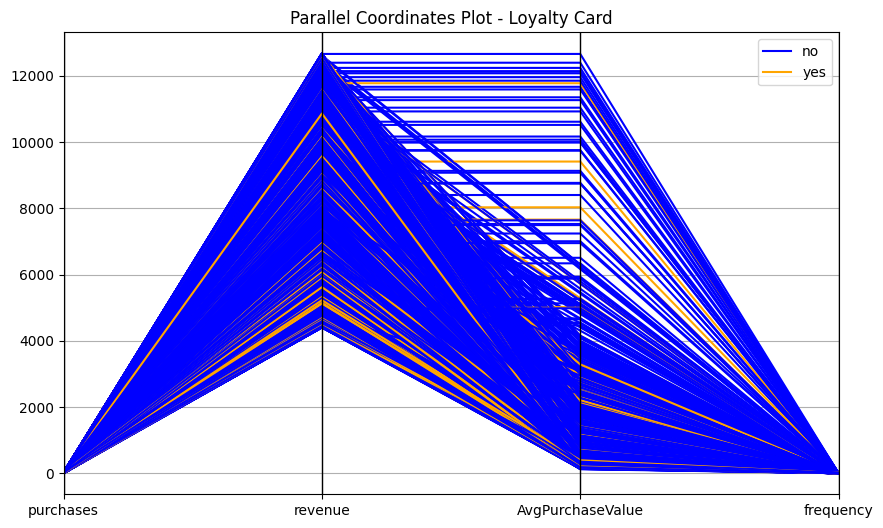

In [21]:
# Select columns for the parallel coordinates plot
selected_columns = ['purchases', 'revenue', 'AvgPurchaseValue', 'frequency', 'LoyaltyCard']

# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_plot = pd.plotting.parallel_coordinates(df[selected_columns], 'LoyaltyCard', color=('blue', 'orange'))
plt.title('Parallel Coordinates Plot - Loyalty Card')
plt.show()

### CLV Modeling:


#####  Ridge regression:
i. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing.

ii. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`.

iii. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?

iv. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# i. Load the dataset and split it into training and testing sets
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'revenue'  # Target

X = df[features]
y = df[target]

# Split the data into training and testing sets (keeping 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ii. Implement a Ridge Regression model
alpha_value = 1.0
ridge_model = Ridge(alpha=alpha_value)

# Standardize the features for Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model.fit(X_train_scaled, y_train)

# iii. Check how the alpha parameter affects the coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge_model.coef_
})

print("Coefficients with alpha =", alpha_value)
print(coefficients)

# iv. Evaluate the model using Mean Squared Error (MSE) on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on the test set: {mse:.2f}")


Coefficients with alpha = 1.0
            Feature  Coefficient
0           Recency   -38.736464
1         Frequency   432.281175
2  AvgPurchaseValue   773.938609

Mean Squared Error on the test set: 5392498.83


#####  Random Forest Regressor:
i. Implement a Random Forest Regressor with 100 trees to predict the CLV.

ii. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.

iii. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [26]:
# Create the CLV column
df['CLV'] = df['AvgPurchaseValue'] * df['Frequency'] * df['Tenure']

# Display the first few rows of the updated DataFrame
print(df.head())

   customerid FirstPurchase LastPurchase  purchases  revenue  \
0        8519    2021-12-31   2022-03-06          7    11670   
1       38152    2019-09-27   2023-02-02         20     5260   
2       19680    2021-06-13   2022-02-04         29     9790   
3       35744    2021-07-28   2022-08-21         15     9591   
4       11663    2021-01-19   2022-03-10         13    10134   

                     Referral Churn  Discounts Category CampaignResponse  ...  \
0       Online advertisements     0          2      Q02          ignored  ...   
1  Traditional media outreach     1          6      F76        purchased  ...   
2     Influencer endorsements     0          2      X04      opened mail  ...   
3     Influencer endorsements     0          5      A25          ignored  ...   
4               Word of mouth     0          3      A16          ignored  ...   

   frequency AvgPurchaseValue Recency Tenure  AvgTimeBetweenPurchases  \
0          7      1667.142857     619    684           

In [30]:

from sklearn.ensemble import RandomForestRegressor

# Feature selection
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'CLV' # Target

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# i. Implement a Random Forest Regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# ii. Get feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

# iii. Evaluate the model's performance using Mean Squared Error (MSE) on the test set
# Predict the target values for the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"\nMean Squared Error for Random Forest Regressor on the test set: {mse_rf:.2f}")


Feature Importance:
            Feature  Importance
2  AvgPurchaseValue    0.413888
0           Recency    0.324679
1         Frequency    0.261434

Mean Squared Error for Random Forest Regressor on the test set: 9829272782627.03


#####  XGBoost:
i. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.

ii. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?

iii. Evaluate the model using the test data and compare its MSE with previous models.

In [28]:
!pip install xgboost

In [29]:
from xgboost import XGBRegressor

# Feature selection
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'CLV' # Target

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# i. Implement XGBoost Regressor with 100 estimators
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# ii. Alter the learning rate (default is 0.3)
learning_rate = 0.1  # Adjust the learning rate as needed
xgb_model_lr = XGBRegressor(n_estimators=100, learning_rate=learning_rate, random_state=42)

# Fit the model to the training data with the altered learning rate
xgb_model_lr.fit(X_train_scaled, y_train)

# iii. Evaluate the models' performance using Mean Squared Error (MSE) on the test set
# Predict the target values for the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_xgb_lr = xgb_model_lr.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_xgb_lr = mean_squared_error(y_test, y_pred_xgb_lr)

print(f"\nMean Squared Error for XGBoost Regressor (learning rate = default): {mse_xgb:.2f}")
print(f"Mean Squared Error for XGBoost Regressor (learning rate = {learning_rate}): {mse_xgb_lr:.2f}")



Mean Squared Error for XGBoost Regressor (learning rate = default): 9810525203574.49
Mean Squared Error for XGBoost Regressor (learning rate = 0.1): 8908037181489.06


##### Advanced Regression Model:

i. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.

ii. Use cross-validation for model selection and tuning.

iii. Evaluate the models using the same metrics as before and compare their performances

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Feature selection
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'revenue' # Target

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Standardize the features using StandardScaler (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models using cross-validation
models = [ridge_model, lasso_model, dt_model, rf_model, gb_model]
model_names = ['Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()  # Convert to positive value

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error on the test set
    mse_test = mean_squared_error(y_test, y_pred)

    # Display results
    print(f"\nModel: {name}")
    print(f"Cross-Validation MSE: {mse_cv:.2f}")
    print(f"Test Set MSE: {mse_test:.2f}")



Model: Ridge
Cross-Validation MSE: 5294925.38
Test Set MSE: 5392498.36

Model: Lasso
Cross-Validation MSE: 5294885.05
Test Set MSE: 5392714.92

Model: Decision Tree
Cross-Validation MSE: 5584.45
Test Set MSE: 3339.95

Model: Random Forest
Cross-Validation MSE: 2311.43
Test Set MSE: 1961.21

Model: Gradient Boosting
Cross-Validation MSE: 106402.35
Test Set MSE: 111094.82


##### Feature Importance:
i. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.

ii. Analyze and interpret the top features affecting totalrevenue.

In [33]:
# Feature selection
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'revenue' # Target

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Standardize the features using StandardScaler (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model.fit(X_train, y_train)

# Extract feature importances
rf_feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
gb_feature_importances = pd.DataFrame({'Feature': features, 'Importance': gb_model.feature_importances_})

# Display feature importances
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances.sort_values(by='Importance', ascending=False))

print("\nGradient Boosting Feature Importances:")
print(gb_feature_importances.sort_values(by='Importance', ascending=False))



Random Forest Feature Importances:
            Feature  Importance
2  AvgPurchaseValue    0.670889
1         Frequency    0.328670
0           Recency    0.000440

Gradient Boosting Feature Importances:
            Feature  Importance
2  AvgPurchaseValue    0.713847
1         Frequency    0.286153
0           Recency    0.000000


##### Model Interpretation:
i. Use techniques like SHAP (SHapley Additive exPlanations) to explain model predictions.

In [34]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.6 MB/s eta 0:00:00


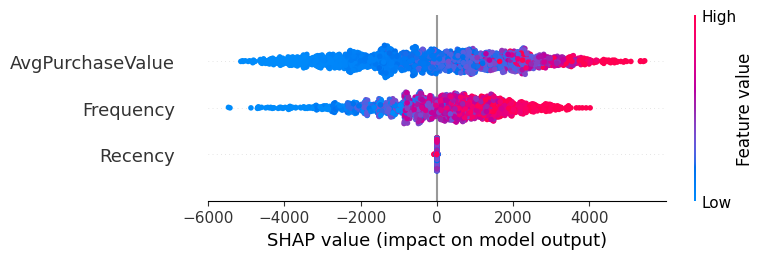

In [38]:
import shap

# Feature selection
features = ['Recency', 'Frequency', 'AvgPurchaseValue']
target = 'revenue'  # Target

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Standardize the features using StandardScaler (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define and train the model (Random Forest in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use SHAP to explain model predictions on the test set
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize the feature importance for a single prediction
shap.summary_plot(shap_values, X_test, feature_names=features)

# Individual prediction explanation for a specific instance (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test[0, :])
